In [ ]:
# Porte Toffoli :
#
# La porte agit sur trois qubits
# Si les deux premiers bits sont dans l'état | 1 ⟩  elle applique une Pauli-X (ou NOT) sur le troisième bit, sinon elle ne fait rien.
#      
# CCNOT =  | 1 0 0 0 0 0 0 0|
#          | 0 1 0 0 0 0 0 0|
#          | 0 0 1 0 0 0 0 0|
#          | 0 0 0 1 0 0 0 0|
#          | 0 0 0 0 1 0 0 0|
#          | 0 0 0 0 0 1 0 0|
#          | 0 0 0 0 0 0 0 1|
#          | 0 0 0 0 0 0 1 0|
#
# La matrice de passage est :
#
#
# H =  | 1 0 0 0 0 0 0 0|
#      | 0 1 0 0 0 0 0 0|
#      | 0 0 1 0 0 0 0 0|
#      | 0 0 0 1 0 0 0 0|
#      | 0 0 0 0 1 0 0 0|
#      | 0 0 0 0 0 1 0 0|
#      | 0 0 0 0 0 0 1 1|
#      | 0 0 0 0 0 0 0 1|
#
# Suivant la matrice : diag(1,1,1,1,1,1,1,-1)
#

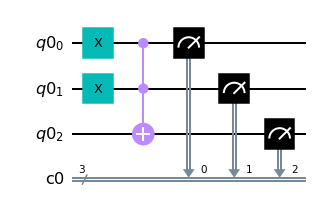

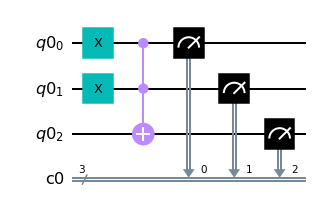

In [1]:
import numpy as np
from qiskit import(
QuantumCircuit,
ClassicalRegister,
QuantumRegister,
execute,
BasicAer)

import matplotlib as ptl

n = 3

q = QuantumRegister(3)
c = ClassicalRegister(3)

# quantum circuit to make a Bell state
bell = QuantumCircuit(q,c)
bell.x([q[0],q[1]])
bell.toffoli(0,1,2)
bell.measure(q,c)

bell.draw(output='mpl')

In [2]:
# execute the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
result = execute(bell, backend, shots=1000).result()
counts  = result.get_counts(bell)
print(counts)

{'111': 1000}


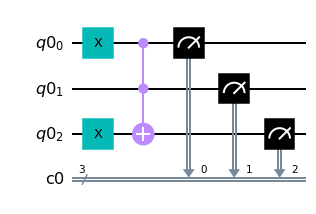

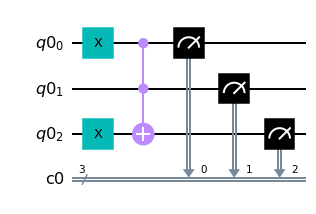

In [3]:
# quantum circuit to make a Bell state
bell2 = QuantumCircuit(q,c)
bell2.x([q[0], q[2]])
bell2.toffoli(0,1,2)
bell2.measure(q,c)

bell2.draw(output='mpl')

In [4]:
# execute the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
result = execute(bell2, backend, shots=1000).result()
counts  = result.get_counts(bell2)
print(counts)

{'101': 1000}


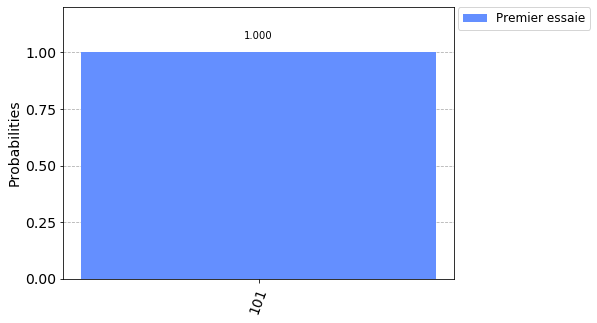

In [5]:
from qiskit.visualization import plot_histogram

hist = plot_histogram([counts], legend=['Premier essaie'])